# CISC 873 Data Mining Competition 4 (Airbnb price category prediction)

## Questions

### Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

- Fully-connected models are not a good fit for sequential data as they don't take into account the sequential nature of the data.
- Fully-connected models are good for image data as they can capture spatial dependencies and learn local and global features.

### What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

- Gradient vanishing occurs when the gradients during backpropagation become very small, which can lead to slow convergence and poor performance.
- Gradient explosion occurs when the gradients become too large, which can cause the model to diverge.
- GRU and LSTM use gating mechanisms to selectively allow information to flow through the network, which helps to mitigate the vanishing and exploding gradient problems.

### What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?

- Multi-objective/multi-task learning involves training a model to optimize multiple objectives or perform multiple tasks simultaneously.
- Multi-modality learning involves training a model to handle multiple types of input modalities, such as text and images.
- In this assignment, we are performing multi-task learning by predicting both the sentiment and emotion of the input text, and we are using a multi-modal model that takes both text and image inputs.

### What is the difference among xgboost, lightgbm and catboost

- XGBoost, LightGBM, and CatBoost are all gradient boosting frameworks that use decision trees as base learners.
- LightGBM and CatBoost use different techniques to improve training efficiency and generalization performance compared to XGBoost.
- LightGBM uses histogram-based techniques for binning and feature selection, while CatBoost uses symmetric decision trees and categorical feature encoding.

## Overview

### Meme competition

Data scientists spend 80% of their time cleaning data and the other 20% complaining about cleaning data.

### Define the problem

The problem is to predict the pricing range of Airbnb listings in Montreal based on their characteristics.

### What is the input?

The input for this problem is a dataset containing different characteristics of Airbnb listings in Montreal, Canada during 2019.

### What is the output?

- The output is a recommended pricing range for new hosts based on the listing characteristics.
    - The pricing range is divided into three categories:
        - beginner (0)
        - plus (1)
        - premium (2)

### What data mining function is required?

- The task required for this problem is **Multi-Class classification**.
- We need to classify each Airbnb listing into one of the three pricing range categories based on the provided listing characteristics.

### What could be the challenges?

- dealing with missing or incomplete data
- select appropriate features for the model to achieve good performance. 
- some listings might have similar characteristics, but their pricing might vary depending on the location, which could add complexity to the problem.

### What is the impact?

- An accurate solution could help new Airbnb hosts to set appropriate pricing ranges for their listings, which could improve their chances of attracting guests and earning income.

### What is an ideal solution?

- A model that accurately predicts the pricing range of Airbnb listings in Montreal based on their features, with high accuracy and low mean squared error.

---

***

## Imports Libraries

### - common libraries

In [1]:
import re
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
%matplotlib inline

seed = 72
np.random.seed(seed)
pd.set_option('display.max_rows', 150)

### - nlp processing

In [2]:
# I tried many translators but I decided to use textblob, it is not that fast but its errors are handlable.
# from googletrans import Translator
# from pygoogletranslation import Translator
# from txtai.pipeline import Translation

# import necessary modules from nltk
import nltk 
from nltk.stem.snowball import EnglishStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# import textblob for translation (other translation packages are commented out)
from textblob import TextBlob
import textblob.exceptions as exception

# install and import langdetect for language detection
!pip install langdetect
from langdetect import detect

# uncomment the following lines if you haven't downloaded these nltk corpora before
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# unzip wordnet corpus to nltk data folder
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=d54a860dfdb25e7e8dd0bf5797e12cdec039123bfec7efa5cd79990802463612
  Stored in directory: /root/.cache/pip/wheels/73/b2/db/0c9b9eb7a44bf85ec0b42c06ee617d0a0de66840dc0b3248d1
Successfully built langdetect
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordn

### - sklearn

In [199]:
# import required libraries

import sklearn # scikit-learn library for machine learning in Python
from sklearn.model_selection import train_test_split # split arrays or matrices into random train and test subsets

import tensorflow as tf # open-source machine learning framework developed by Google
from tensorflow.keras.preprocessing.text import Tokenizer # Tokenization is a process of converting text data into numerical data
from tensorflow.keras.preprocessing.sequence import pad_sequences # sequence preprocessing utility to pad sequences to the same length
from tensorflow.keras.preprocessing.image import load_img, img_to_array # load image into memory and convert to numpy array
from tensorflow.keras.callbacks import EarlyStopping # callback to stop training when a monitored metric has stopped improving

from tensorflow.keras.utils import to_categorical # convert a class vector (integers) to binary class matrix
from tensorflow.keras.regularizers import l2 # L2 regularization
from tensorflow.keras.layers import Input, Dense, Embedding, GRU, LSTM, Bidirectional, Conv2D, Dropout, Flatten, concatenate, Concatenate, MaxPooling2D, MaxPool2D # layers to be used in the model
from tensorflow.keras.models import Model # model class to build and train machine learning models
from tensorflow.keras.optimizers import Adam, SGD, RMSprop # optimization algorithms used in training the model

For dealing with text related tasks, we will be using [nltk](https://www.nltk.org). The terrific [scikit-learn](https://scikit-learn.org/) library will be used to handle tasks related to machine learning.  
Now, we can take a peek into the data:

## Read data set

In [4]:
# reads in the training data from a CSV file called train_xy.csv.
# The file is located in the /kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/ directory.
# The pd.read_csv() function from the pandas library is used to read the file and store it in a dataframe called data

data = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv')
data

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [5]:
# Read test data for just trying the same processes but I will read it again later.
# data = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv')
# data

#### Take A copy

In [200]:
df = data.copy()
df

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


## Data Visualization

In [7]:
# display the classes balance
df.price.value_counts()

0    4737
1    2403
2     487
Name: price, dtype: int64

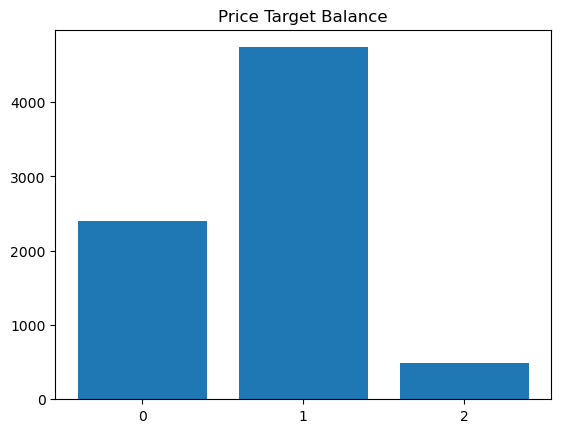

In [201]:
# plot column price which is the target column to see the classes balance
plt.bar(df.price.unique(), df.price.value_counts())
# make axis as discrete values
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Price Target Balance')
plt.show()

<AxesSubplot:>

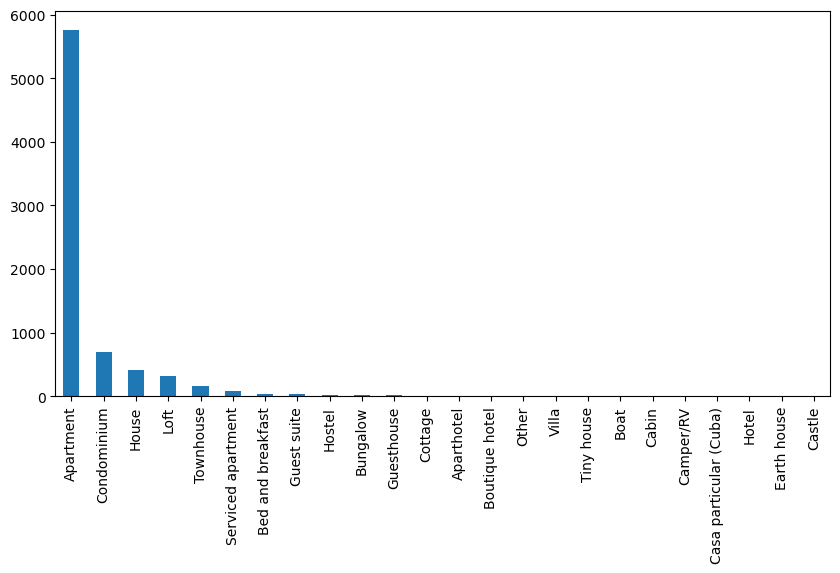

In [205]:
# plot column price which is the target column to see the classes balance
plt.rcParams["figure.figsize"] = (10, 5)
df.type.value_counts().plot(kind='bar')

In [206]:
# display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


## Data Cleaning

### Preprocessing

#### Check Missing Values
there are many missing values

In [207]:
df.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [208]:
# missing values with respect to the label
df.price[df.summary.isnull()].value_counts()

0    191
1     91
2     19
Name: price, dtype: int64

#### fill na with constant

In [209]:
# This function fills in missing values in a DataFrame column named 'summary'
# by replacing them with the string 'summary'
def fillna(df):
    df.summary.fillna(value='summary', inplace=True)
    print(df.isnull().sum())
    return df


# This function checks if a given list 'line' is empty and if it is, returns a list containing the string 'summary'
def fillEmpty(line):
    if len(line) == 0:
        return ['summary']
    else:
        return line

In [210]:
# use the predefined function to fillna
df = fillna(df)

summary    0
image      0
type       0
price      0
dtype: int64


#### Check Duplications
there is no duplicated rows

In [14]:
df.duplicated().sum()

0

### Cleaning

#### Stopwords
get stopwords from many resources and use them together

In [15]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # Importing stopword list from scikit-learn library
from gensim.parsing.preprocessing import STOPWORDS # Importing stopword list from gensim library
from nltk.corpus import stopwords as nltk_sw # Importing stopword list from Natural Language Toolkit (NLTK) library

In [16]:
# Creating a list of stopwords in English language using the 'words' function from the NLTK library.
# The list contains common words such as 'the', 'and', 'a', 'an', etc. that are often removed from text data during natural language processing tasks.
nltk_stopwords = nltk_sw.words('english') 

In [17]:
stopwords = list(ENGLISH_STOP_WORDS) + list(STOPWORDS) + nltk_stopwords # Combining stopword lists from scikit-learn, gensim, and NLTK libraries into a single list
print(len(stopwords)) # Print the length of the combined list of stopwords
stopwords = list(set(stopwords)) # Removing duplicates from the combined list using the set() function and then converting it back to a list
print(len(stopwords)) # Print the length of the de-duplicated list of stopwords

834
390


##### Clean stopwords

In [211]:
def remove_punctuation(word):
    return re.sub('[^\sa-zA-Z]', '', word) # Using regular expression to remove any character that is not a letter or space from the input string

# Applying the remove_punctuation() function to each word in the list of stopwords using list comprehension,
# and creating a new list of stopwords with punctuations removed.
stopwords = [remove_punctuation(word) for word in stopwords]

#### Lemmatization and Stemming process

In [212]:
def get_wordnet_pos(treebank_tag):
    """
    This function maps the Treebank POS tags to WordNet POS tags.

    Args:
        treebank_tag (str): Treebank POS tag.

    Returns:
        str: WordNet POS tag.
    """
    if treebank_tag.startswith('J'):
        return 'a'
    elif treebank_tag.startswith('V'):
        return 'v'
    elif treebank_tag.startswith('N'):
        return 'n'
    elif treebank_tag.startswith('R'):
        return 'r'
    else:
        return 'n'


lemmatizer = WordNetLemmatizer()
def lemmatize(words):
    """
    This function lemmatizes a list of words.

    Args:
        words (list): A list of words.

    Returns:
        list: A list of lemmas.
    """
    lemmas = []
    pos_tags = nltk.pos_tag(words)
    for token, pos in pos_tags:
        wordnet_pos = get_wordnet_pos(pos)
        lemma = lemmatizer.lemmatize(token, pos=wordnet_pos)
        lemmas.append(lemma)
    return lemmas


def lemmatize_word(word):
    """
    This function lemmatizes a single word.

    Args:
        word (str): A word.

    Returns:
        str: The lemma of the input word.
    """
    pos_tags = nltk.pos_tag([word])
    for token, pos in pos_tags:
        wordnet_pos = get_wordnet_pos(pos)
        lemma = lemmatizer.lemmatize(token, pos=wordnet_pos)
    return lemma


# stemmer = EnglishStemmer()
stemmer = SnowballStemmer("english")
def stemming(words):
    """
    This function stems a list of words.

    Args:
        words (list): A list of words.

    Returns:
        list: A list of stems.
    """
    stems = []
    for word in words:
        word = stemmer.stem(word)
        stems.append(word)
    return stems


def translate(line):
    """
    This function translates a sentence to English.

    Args:
        line (str): A sentence.

    Returns:
        str: The translated sentence.
    """
    try:
        from_lang = detect(line)
        if from_lang != 'en':
            sentence = TextBlob(line).translate(from_lang=from_lang, to='en')
            # sentence = translator.translate(line, dest='en').text
            return sentence
        else:
            return line
    except:
        return line

#### User defined Functions

In [213]:
# Define a lambda function that joins words into a sentence
joinUDF = lambda words: ' '.join(words)

# Define a lambda function that removes words containing special characters
removeSpecialCasesUDF = lambda words: [word for word in words if not (('@' in word) | ('©' in word) | ('www' in word) | ('http' in word))]

# Define a lambda function that removes non-words from the list of words
removeNonWordsUDF = lambda words: [word for word in words if not ((len(word) < 3) | ('\t' in word) | ('\n' in word) | ('\r' in word) | ('\f' in word) | ('\b' in word))]  

# Define a lambda function that removes stop words and words with less than 3 characters
removeStopWordsUDF = lambda words: [word for word in words if not ((word in stopwords) | (len(word) < 3) | ('©' in word) | ('\t' in word) | ('\n' in word) | ('\r' in word) | ('\f' in word) | ('\b' in word))]  

# Define a lambda function that removes punctuation from the words
removePunctuationUDF = lambda words: re.sub('[^\sA-Za-zÀ-ž]', ' ', words)

# Define a lambda function that lemmatizes the words
lemmaUDF = lambda words: lemmatize(words)

# Define a lambda function that stems the words
stemUDF = lambda words: stemming(words)

In [21]:
displayed_row = 4
print("Cleaning and parsing the tweets...\n")

Cleaning and parsing the tweets...



#### Try my custom cleaning steps
trying them step by step and disply the output to explain the approach

#### Take A copy

In [22]:
df1 = df.copy()

##### 1. Convert data to lowercase

In [23]:
df1.summary = df1.summary.str.lower()
print(df1.summary.iloc[displayed_row])

très grand appartement ''rustique'' et très agréable a vivre à louer dans un quartier sympa de montréal. une grande chambre au sous-sol et au rez de chaussée il y a une chambre, une grande cuisine salle à manger et un grand salon double la cuisine offre de nombreuses machines comme un mixeur, un robot ménager, une cafetière, une machine a panini, une machine a gaufre, ... très proche du du bord du fleuve et du centre-ville de verdun et de montréal à pied, en métro, vélo ou autobus.


##### 2. Split text to words (Tokenize)

In [24]:
df1.summary = df1.summary.str.split(' ')
print(df1.summary.iloc[displayed_row])

['très', 'grand', 'appartement', "''rustique''", 'et', 'très', 'agréable', 'a', 'vivre', 'à', 'louer', 'dans', 'un', 'quartier', 'sympa', 'de', 'montréal.', 'une', 'grande', 'chambre', 'au', 'sous-sol', 'et', 'au', 'rez', 'de', 'chaussée', 'il', 'y', 'a', 'une', 'chambre,', 'une', 'grande', 'cuisine', 'salle', 'à', 'manger', 'et', 'un', 'grand', 'salon', 'double', 'la', 'cuisine', 'offre', 'de', 'nombreuses', 'machines', 'comme', 'un', 'mixeur,', 'un', 'robot', 'ménager,', 'une', 'cafetière,', 'une', 'machine', 'a', 'panini,', 'une', 'machine', 'a', 'gaufre,', '...', 'très', 'proche', 'du', 'du', 'bord', 'du', 'fleuve', 'et', 'du', 'centre-ville', 'de', 'verdun', 'et', 'de', 'montréal', 'à', 'pied,', 'en', 'métro,', 'vélo', 'ou', 'autobus.']


##### 3. Remove Special Cases
- urls start with http
- tags start with @
- links start with www

In [25]:
df1.summary = df1.summary.apply(removeSpecialCasesUDF)
print(df1.summary.iloc[displayed_row])

['très', 'grand', 'appartement', "''rustique''", 'et', 'très', 'agréable', 'a', 'vivre', 'à', 'louer', 'dans', 'un', 'quartier', 'sympa', 'de', 'montréal.', 'une', 'grande', 'chambre', 'au', 'sous-sol', 'et', 'au', 'rez', 'de', 'chaussée', 'il', 'y', 'a', 'une', 'chambre,', 'une', 'grande', 'cuisine', 'salle', 'à', 'manger', 'et', 'un', 'grand', 'salon', 'double', 'la', 'cuisine', 'offre', 'de', 'nombreuses', 'machines', 'comme', 'un', 'mixeur,', 'un', 'robot', 'ménager,', 'une', 'cafetière,', 'une', 'machine', 'a', 'panini,', 'une', 'machine', 'a', 'gaufre,', '...', 'très', 'proche', 'du', 'du', 'bord', 'du', 'fleuve', 'et', 'du', 'centre-ville', 'de', 'verdun', 'et', 'de', 'montréal', 'à', 'pied,', 'en', 'métro,', 'vélo', 'ou', 'autobus.']


##### 4. Join the words again for more preprocessing

In [26]:
df1.summary = df1.summary.apply(joinUDF)
print(df1.summary.iloc[displayed_row])

très grand appartement ''rustique'' et très agréable a vivre à louer dans un quartier sympa de montréal. une grande chambre au sous-sol et au rez de chaussée il y a une chambre, une grande cuisine salle à manger et un grand salon double la cuisine offre de nombreuses machines comme un mixeur, un robot ménager, une cafetière, une machine a panini, une machine a gaufre, ... très proche du du bord du fleuve et du centre-ville de verdun et de montréal à pied, en métro, vélo ou autobus.


##### 5. Remove Punctuations

In [27]:
df1.summary = df1.summary.apply(removePunctuationUDF)
print(df1.summary.iloc[displayed_row])

très grand appartement   rustique   et très agréable a vivre à louer dans un quartier sympa de montréal  une grande chambre au sous sol et au rez de chaussée il y a une chambre  une grande cuisine salle à manger et un grand salon double la cuisine offre de nombreuses machines comme un mixeur  un robot ménager  une cafetière  une machine a panini  une machine a gaufre      très proche du du bord du fleuve et du centre ville de verdun et de montréal à pied  en métro  vélo ou autobus 


##### 6. Split text to words (Tokenize)

In [28]:
df1.summary = df1.summary.str.split(' ')
print(df1.summary.iloc[displayed_row])

['très', 'grand', 'appartement', '', '', 'rustique', '', '', 'et', 'très', 'agréable', 'a', 'vivre', 'à', 'louer', 'dans', 'un', 'quartier', 'sympa', 'de', 'montréal', '', 'une', 'grande', 'chambre', 'au', 'sous', 'sol', 'et', 'au', 'rez', 'de', 'chaussée', 'il', 'y', 'a', 'une', 'chambre', '', 'une', 'grande', 'cuisine', 'salle', 'à', 'manger', 'et', 'un', 'grand', 'salon', 'double', 'la', 'cuisine', 'offre', 'de', 'nombreuses', 'machines', 'comme', 'un', 'mixeur', '', 'un', 'robot', 'ménager', '', 'une', 'cafetière', '', 'une', 'machine', 'a', 'panini', '', 'une', 'machine', 'a', 'gaufre', '', '', '', '', '', 'très', 'proche', 'du', 'du', 'bord', 'du', 'fleuve', 'et', 'du', 'centre', 'ville', 'de', 'verdun', 'et', 'de', 'montréal', 'à', 'pied', '', 'en', 'métro', '', 'vélo', 'ou', 'autobus', '']


##### 7. Remove Non-word

In [29]:
df1.summary = df1.summary.apply(removeNonWordsUDF)
print(df1.summary.iloc[displayed_row])

['très', 'grand', 'appartement', 'rustique', 'très', 'agréable', 'vivre', 'louer', 'dans', 'quartier', 'sympa', 'montréal', 'une', 'grande', 'chambre', 'sous', 'sol', 'rez', 'chaussée', 'une', 'chambre', 'une', 'grande', 'cuisine', 'salle', 'manger', 'grand', 'salon', 'double', 'cuisine', 'offre', 'nombreuses', 'machines', 'comme', 'mixeur', 'robot', 'ménager', 'une', 'cafetière', 'une', 'machine', 'panini', 'une', 'machine', 'gaufre', 'très', 'proche', 'bord', 'fleuve', 'centre', 'ville', 'verdun', 'montréal', 'pied', 'métro', 'vélo', 'autobus']


##### 8. Join the words again for more preprocessing

In [30]:
df1.summary = df1.summary.apply(joinUDF)
print(df1.summary.iloc[displayed_row])

très grand appartement rustique très agréable vivre louer dans quartier sympa montréal une grande chambre sous sol rez chaussée une chambre une grande cuisine salle manger grand salon double cuisine offre nombreuses machines comme mixeur robot ménager une cafetière une machine panini une machine gaufre très proche bord fleuve centre ville verdun montréal pied métro vélo autobus


##### 9. Translate

In [31]:
# %%time
# df1.summary = df1.summary.apply(translate)
# print(df1.summary.iloc[displayed_row])

In [32]:
# print(df1.isnull().sum())

In [33]:
# store the translated version after preprocessing it because it took 22min 54sec for training and 36min 64sec for testing to finish this process.
# df1 = fillna(df1)
# df1.to_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x_translated.csv', index=False)
# df1.to_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy_translated.csv', index=False)


In [34]:
# start from here 
# df1 = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x_translated.csv')
df1 = pd.read_csv('/kaggle/input/competition4/train_xy_translated.csv')
print(df1.isnull().sum())

summary    0
image      0
type       0
price      0
dtype: int64


##### 10. Split text to words (Tokenize)

In [35]:
df1.summary = df1.summary.str.lower()
df1.summary = df1.summary.apply(removePunctuationUDF)
df1.summary = df1.summary.str.split(' ')
print(df1.summary.iloc[displayed_row])
print((df1.summary.str.len() == 0).sum())

['very', 'large', 'rustic', 'apartment', 'very', 'pleasant', 'living', 'in', 'a', 'nice', 'montreal', 'district', 'a', 'large', 'bedroom', 'under', 'floor', 'ground', 'floor', 'a', 'bedroom', 'a', 'large', 'kitchen', 'dining', 'room', 'large', 'kitchen', 'living', 'room', 'offers', 'many', 'machines', 'as', 'a', 'mixer', 'robot', 'household', 'a', 'coffee', 'maker', 'a', 'panini', 'machine', 'a', 'machine', 'gauger', 'very', 'close', 'city', 'verdun', 'montreal', 'pied', 'metro', 'bus', 'bike']
0


##### 7. Remove Stopwords

In [36]:
df1.summary = df1.summary.apply(removeStopWordsUDF)
print(df1.summary.iloc[displayed_row])

['large', 'rustic', 'apartment', 'pleasant', 'living', 'nice', 'montreal', 'district', 'large', 'bedroom', 'floor', 'ground', 'floor', 'bedroom', 'large', 'kitchen', 'dining', 'room', 'large', 'kitchen', 'living', 'room', 'offers', 'machines', 'mixer', 'robot', 'household', 'coffee', 'maker', 'panini', 'machine', 'machine', 'gauger', 'close', 'city', 'verdun', 'montreal', 'pied', 'metro', 'bus', 'bike']


##### 8. Apply Lemmatization

In [37]:
df1.summary = df1.summary.apply(lemmaUDF)
print(df1.summary.iloc[displayed_row])

['large', 'rustic', 'apartment', 'pleasant', 'live', 'nice', 'montreal', 'district', 'large', 'bedroom', 'floor', 'ground', 'floor', 'bedroom', 'large', 'kitchen', 'din', 'room', 'large', 'kitchen', 'living', 'room', 'offer', 'machine', 'mixer', 'robot', 'household', 'coffee', 'maker', 'panini', 'machine', 'machine', 'gauger', 'close', 'city', 'verdun', 'montreal', 'pied', 'metro', 'bus', 'bike']


##### 9. Apply Stemmer

In [38]:
# df1.summary = df1.summary.apply(stemUDF)
# print(df1.summary.iloc[displayed_row])

##### 10. Join the words again

In [39]:
df1.summary = df1.summary.apply(joinUDF)
print(df1.summary.iloc[displayed_row])

large rustic apartment pleasant live nice montreal district large bedroom floor ground floor bedroom large kitchen din room large kitchen living room offer machine mixer robot household coffee maker panini machine machine gauger close city verdun montreal pied metro bus bike


In [40]:
print("Done Cleaning and parsing the tweets.\n")

Done Cleaning and parsing the tweets.



### Post-Processing

#### Take a copy form the data

In [41]:
df2 = df1.copy()

#### Check Empty Values
which produced after cleaning

In [42]:
(df2.summary.str.len() == 0).sum()

0

#### Check Duplications

In [43]:
df2.duplicated().sum()

0

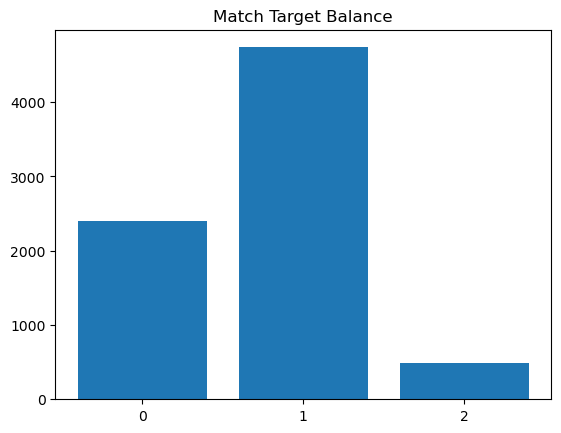

In [44]:
plt.bar(df2.price.unique(), df2.price.value_counts())
# make axis as discrete values
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Match Target Balance')
plt.show()

### Descriptive analysis

Even though we deal with texts, we should still use some descriptive analysis to get a better understanding of the data:

In [45]:
!pip install bokeh
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df2.summary).split()).value_counts().sort_values(ascending=False)
word_freq[1:50]

montreal      4134
metro         3367
walk          3164
locate        2983
minute        2900
room          2897
restaurant    2427
downtown      2338
min           2245
park          2181
bedroom       2119
street        1902
place         1891
close         1815
station       1728
bed           1717
heart         1630
royal         1563
kitchen       1535
away          1364
large         1347
mont          1319
bar           1318
near          1300
beautiful     1270
shop          1224
bus           1223
quiet         1208
city          1169
plateau       1127
floor         1123
old           1103
private       1087
fully         1084
stay          1066
perfect       1031
store         1022
grocery        995
area           990
bathroom       990
equip          985
space          982
location       976
distance       912
center         899
couple         887
home           861
enjoy          860
access         849
dtype: int64

In [46]:
# list most uncommon words
word_freq[-10:].reset_index(name="freq")

,index,freq
0,rockhill,1
1,modality,1
2,faar,1
3,bononza,1
4,mac,1
5,situéta,1
6,withbathtub,1
7,flavor,1
8,delectable,1
9,song,1


In [47]:
# Distribution of labels
df2.price.value_counts(normalize=True)

0    0.621083
1    0.315065
2    0.063852
Name: price, dtype: float64

### Merge Cleaning in one function
<!-- now we can combine all the above cleaning methods in two methods one for stemmer and one for lemmatizer -->
I was going to separate lemmatization and stemming but I thing doing lemma then stem will produce better data cleaning as I done above

##### With Stemmer

In [214]:
# Define function to clean and stem text
def clean_text_stemmer(df):
    # Print progress message
    print("Cleaning and parsing the tweets...\n")
    
    # Convert all text to lowercase
    df.summary = df.summary.str.lower()
    
    # Remove punctuation from text
    df.summary = df.summary.apply(removePunctuationUDF)
    
    # Split text into list of words
    df.summary = df.summary.str.split(' ')
    
    # Remove stop words from text
    df.summary = df.summary.apply(removeStopWordsUDF)
    
    # Fill empty values with placeholder
    df.summary = df.summary.apply(fillEmpty)
    
    # Stem text
    df.summary = df.summary.apply(stemUDF)
    
    # Join list of words back into text
    df.summary = df.summary.apply(joinUDF)

    # Print progress message
    print("Done Cleaning and parsing the tweets.\n")
    
    # Return cleaned and stemmed dataframe
    return df

##### With Lemmatizer

In [215]:
# Define function to clean and lemma text
def clean_text_lemmatizer(df):
    # Print progress message
    print("Cleaning and parsing the tweets...\n")
    
    # Convert all text to lowercase
    df.summary = df.summary.str.lower()
    
    # Remove punctuation from text
    df.summary = df.summary.apply(removePunctuationUDF)
    
    # Split text into list of words
    df.summary = df.summary.str.split(' ')
    
    # Remove stop words from text
    df.summary = df.summary.apply(removeStopWordsUDF)
    
    # Fill empty values with placeholder
    df.summary = df.summary.apply(fillEmpty)
    
    # Lemma text
    df.summary = df.summary.apply(stemUDF)
    
    # Join list of words back into text
    df.summary = df.summary.apply(joinUDF)

    # Print progress message
    print("Done Cleaning and parsing the tweets.\n")
    
    # Return cleaned and stemmed dataframe
    return df

## Trails

My plan was to apply the trails on:
- start with simple using text only
- then try using images only
- try using multi-modality (text+image)
- try adding GRU/LSTM
- try adding BiDirectional
- then try multi-objective model (predicting both price and type)

I changed the plan again because this plan give me too low accuracy,

the new plan will be:

- try using multi-modality (text+image)
- try adding GRU
- try adding LSTM
- try adding BiDirectional with LSTM
- try adding BiDirectional with GRU
- then try multi-objective model (predicting both price and type)

Really .....

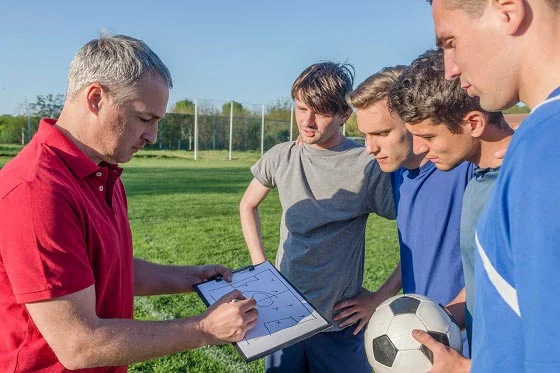

:D just kidding,

I will discuss each trail bellow

### First thing first Submission Generator :D

In [216]:
# calculate the score and store it in a csv file to submit it in kaggle
def saveScore(model, ids, input_data, name):
    # Use the trained model to predict the output for the given input data
    y_hat = model.predict(input_data)
    price_pred = y_hat['price']
    # Extract the category with the highest predicted probability as the predicted price category
    price_pred_cat = np.argmax(price_pred, axis=1)

    # Create a dataframe with the predicted price categories for each product id
    pred_df = pd.DataFrame(data={'id': ids, 'price': price_pred_cat})
    # Save the dataframe as a csv file with a given name
    pred_df.to_csv(f'Adham Mokhtar {name}.csv', index=False)
    # Print a message to confirm that the score has been saved
    print(f'Done saving score for {name}')

In [217]:
def check_accuracy(model, X_test, y_test):
    # predict the prices and types for the test set
    y_hat = model.predict(X_test)
    price_pred = y_hat['price']
    type_pred = y_hat['type']

    # calculate the predicted categories for prices and types
    price_pred_cat = np.argmax(price_pred, axis=1)
    type_pred_cat = np.argmax(type_pred, axis=1)

    # calculate the accuracy score for prices
    price_accuracy = np.average(np.abs(y_test['price'] - price_pred_cat))
    print(f'price accuracy score is: {price_accuracy}')

    # calculate the accuracy score for types
    type_accuracy = np.average(np.abs(y_test['type'] - type_pred_cat))
    print(f'type accuracy score is: {type_accuracy}')

In [219]:
def display_type_accuracy(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['type_sparse_categorical_accuracy']) # plot training accuracy
    plt.plot(history.history['val_type_sparse_categorical_accuracy']) # plot validation accuracy
    plt.title('Model Accuracy') # set plot title
    plt.ylabel('Accuracies') # set y-axis label
    plt.xlabel('Epochs') # set x-axis label
    plt.legend(['Train', 'Validation'], loc='upper left') # add legend to the plot
    plt.show() # display the plot


def display_price_accuracy(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['price_sparse_categorical_accuracy']) # plot training accuracy
    plt.plot(history.history['val_price_sparse_categorical_accuracy']) # plot validation accuracy
    plt.title('Model Accuracy') # set plot title
    plt.ylabel('Accuracies') # set y-axis label
    plt.xlabel('Epochs') # set x-axis label
    plt.legend(['Train', 'Validation'], loc='upper left') # add legend to the plot
    plt.show() # display the plot

### Prepaire Test data

#### Read Test Data

In [53]:
#I will start from reading the translated files for speeding the process
test_data = pd.read_csv('/kaggle/input/competition4/test_x_translated.csv')
test_data

,id,summary,image
0,0,charming warm house ready host you here multi ...,img_test/0.jpg
1,1,room is spacious bright in shared apartment wi...,img_test/1.jpg
2,2,Large comfortable bedroom located under floor ...,img_test/2.jpg
3,3,Near metro Orange line on foot residential are...,img_test/3.jpg
4,4,very bright appartment and very cosy separate ...,img_test/4.jpg
...,...,...,...
7355,7626,large fully furnished flat with brick walls an...,img_test/7627.jpg
7356,7627,Accommodation located in High Duplex Viven Cha...,img_test/7628.jpg
7357,7628,place close parks place good for couples,img_test/7629.jpg
7358,7629,for security reasons will prioritize guests wi...,img_test/7630.jpg


#### Clean Test Data
I already work on both stem and lemma separatly but I decided to work with lemma.

In [54]:
test_data = clean_text_lemmatizer(test_data)
test_data

Cleaning and parsing the tweets...

Done Cleaning and parsing the tweets.



,id,summary,image
0,0,charm warm house ready host multi cultural par...,img_test/0.jpg
1,1,room spacious bright share apartment roommate,img_test/1.jpg
2,2,large comfortable bedroom locate floor house l...,img_test/2.jpg
3,3,near metro orange line foot residential area a...,img_test/3.jpg
4,4,bright appartment cosy separate bedroom queen ...,img_test/4.jpg
...,...,...,...
7355,7626,large fully furnish flat brick wall hardwood f...,img_test/7627.jpg
7356,7627,accommodation locate high duplex viven charm m...,img_test/7628.jpg
7357,7628,place close park place good couple,img_test/7629.jpg
7358,7629,security reason prioritize guest review thank ...,img_test/7630.jpg


### Clean Training Data

#### Read Train Data

In [55]:
#I will start from reading the translated files for speeding the process
train_data = pd.read_csv('/kaggle/input/competition4/train_xy_translated.csv')
train_data

,summary,image,type,price
0,spacious sunny and cozy modern apartment the h...,img_train/0.jpg,Apartment,1
1,located one the most vibrant and accessible lo...,img_train/1.jpg,Apartment,0
2,Housing Coquet Douillet Minutes City City Mont...,img_train/2.jpg,Apartment,1
3,beautiful and spacious condo the floor the wes...,img_train/3.jpg,Apartment,1
4,Very large rustic apartment very pleasant livi...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,Large accommodation everything included well l...,img_train/7626.jpg,Apartment,0
7623,magnificent condo directly the river you will ...,img_train/7627.jpg,Apartment,2
7624,this apartment perfect for anyone visiting the...,img_train/7628.jpg,Apartment,1
7625,cozy clean and comfortable apartment heart dow...,img_train/7629.jpg,Apartment,0


#### Clean Train Data
I already work on both stem and lemma separatly but I decided to work with lemma.

In [56]:
train_data = clean_text_lemmatizer(train_data)
train_data

Cleaning and parsing the tweets...

Done Cleaning and parsing the tweets.



,summary,image,type,price
0,spacious sunny cozy modern apartment heart mon...,img_train/0.jpg,Apartment,1
1,locate vibrant accessible location downtown mo...,img_train/1.jpg,Apartment,0
2,housing coquet douillet minute city city montr...,img_train/2.jpg,Apartment,1
3,beautiful spacious condo floor west island mon...,img_train/3.jpg,Apartment,1
4,large rustic apartment pleasant live nice mont...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,large accommodation include lit locate quiet b...,img_train/7626.jpg,Apartment,0
7623,magnificent condo directly river sleep song wi...,img_train/7627.jpg,Apartment,2
7624,apartment perfect visit city locate eclectic n...,img_train/7628.jpg,Apartment,1
7625,cozy clean comfortable apartment heart downtow...,img_train/7629.jpg,Apartment,0


### Split data to train and validation
using lemma

In [220]:
# Calculate the number of unique classes for price and type
price_class_num = len(train_data.price.unique())
type_class_num = len(train_data.type.unique())

# Split the data into train and test sets, with 10% reserved for testing
# Stratify the split based on price to maintain class balance between train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns=['price', 'type']), 
                                                    train_data[['price', 'type']], 
                                                    test_size=0.1, 
                                                    random_state=seed, 
                                                    stratify=train_data['price'])

# Print the shape of the train and test sets to verify the split
print(X_train.shape)
print(X_test.shape)

(6864, 2)
(763, 2)


In [221]:
# check value counts
y_train.value_counts()

price  type                  
0      Apartment                 3370
1      Apartment                 1573
0      Condominium                291
1      Condominium                263
2      Apartment                  247
0      House                      225
       Loft                       151
1      Loft                       112
       House                       96
0      Townhouse                   86
2      Condominium                 66
       House                       45
1      Townhouse                   42
       Serviced apartment          35
2      Loft                        30
0      Bed and breakfast           27
2      Townhouse                   25
0      Hostel                      21
       Serviced apartment          20
       Bungalow                    19
       Guest suite                 18
2      Serviced apartment          14
0      Guesthouse                  12
1      Bed and breakfast           10
       Guest suite                  7
2      Aparthotel   

---

***

### Read Images and Process Text

In [59]:
# Define the maximum length of the text sequences
max_text_length = 20
# Define image size
image_size = (64, 64)
# Define Early Stoping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [222]:
from PIL import Image

def process_inputs(X_train, y_train):

    # Define the tokenizer
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train['summary'])

    # Convert the text data to sequences and pad them
    sequences = tokenizer.texts_to_sequences(X_train['summary'])
    padded_sequences = pad_sequences(sequences, maxlen=max_text_length, padding='post')

    # Define a function to load and preprocess images
    def load_image(path):
        try:
            # Open the image, convert it to grayscale, and resize it
            image = Image.open(f'/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/{path}').convert('LA').resize(image_size)
            # Normalize the pixel values between 0 and 1
            arr = np.array(image) / 255.0
        except:
            # If there was an error loading the image, create a zero array instead
            arr = np.zeros((*image_size, 2))
        return arr

    # Load the image data and preprocess it
    images = np.array([load_image(path) for path in tqdm(X_train.image)])

    # Convert the categorical labels to codes
    y_train['type'] = y_train.type.astype('category').cat.codes
    y_train['price'] = y_train.price.astype('category').cat.codes

    # Combine the text, image, and label data into a tuple
    labels = np.array(y_train)
    
    # Return the preprocessed data and the tokenizer
    return padded_sequences, images, labels, tokenizer

In [223]:
def process_test_inputs(X_test):

    # Define the tokenizer
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_test['summary'])

    # Convert the text data to sequences and pad them
    sequences = tokenizer.texts_to_sequences(X_test['summary'])
    padded_sequences = pad_sequences(sequences, maxlen=max_text_length, padding='post')

    # Define a function to load images
    def load_image(path):
        try:
            # Open the image and convert it to grayscale with alpha channel (LA)
            # then resize it to a specified size
            image = Image.open(f'/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/{path}').convert('LA').resize(image_size)
            arr = np.array(image) / 255.0  # Normalize the pixel values to be between 0 and 1
        except:
            arr = np.zeros((*image_size, 2))  # If the image cannot be loaded, return a blank image
        return arr

    # Load the image data and resize them
    images = np.array([load_image(path) for path in tqdm(X_test.image)])
    
    return padded_sequences, images

### Processing Data

In [62]:
sequences, images, labels, tokenizer = process_inputs(X_train, y_train)

  0%|          | 0/6864 [00:00<?, ?it/s]

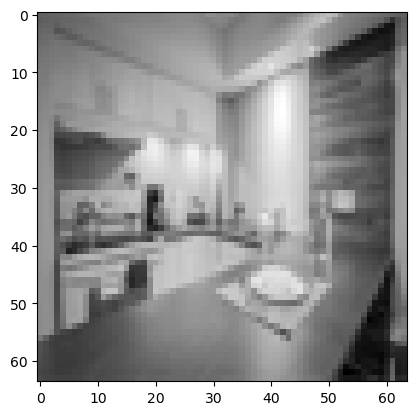

In [63]:
plt.imshow(images[0, :, :, 0], cmap='gray')

In [64]:
val_sequences, val_images, val_labels, val_tokenizer = process_inputs(X_test, y_test)

  0%|          | 0/763 [00:00<?, ?it/s]

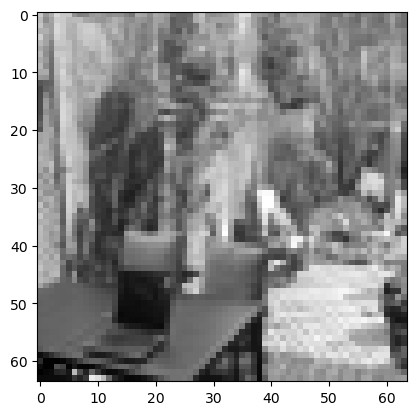

In [65]:
plt.imshow(val_images[0, :, :, 0], cmap='gray')

### Processing Test Data

In [66]:
test_sequences, test_images = process_test_inputs(test_data)

  0%|          | 0/7360 [00:00<?, ?it/s]

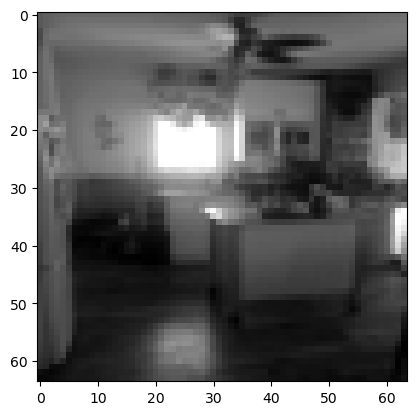

In [67]:
plt.imshow(test_images[0, :, :, 0], cmap='gray')

---

***

### 1. Trail
try to classify using the images and the text but without the Bidirectional and the LSTM, lets just make it as simple as posible

#### Build Model

In [145]:
def create_multi_input_gru_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num):
    # Define two inputs: one for text and one for image
    text_input = Input(batch_shape=(None, max_text_length))
    image_input = Input(batch_shape=(None, *image_size, 2))

    # Text processing part
    # Use embedding layer to map input text to continuous space
    vocab_size = len(tokenizer.word_index)
    embedded_text = Embedding(vocab_size + 1, 100)(text_input)
    # Apply GRU to process the embedded text
    text_output = GRU(4)(embedded_text)

    # Image processing part
    num_filters = 32
    kernel_size = (16, 16)
    pool_size = (4, 4)
    # Apply convolution with a 15x15 filter and 10 filters
    conv_output = Conv2D(num_filters, kernel_size, activation='relu')(image_input)
    # Add maxpooling layer to downsample the output of the convolution
    maxpool_output = MaxPooling2D(pool_size)(conv_output)
    # Flatten the output of the maxpooling layer
    flattened_output = Flatten()(maxpool_output)

    # Combine the processed text and image features
    fused_features = tf.concat([text_output, flattened_output], axis=-1)
#     fused_features = Dropout(0.2)(fused_features)
#     fused_features = Dense(64, activation='relu')(fused_features)

    

    # Define two output layers: one for type classification and one for price classification
    type_output = Dense(type_class_num, activation='softmax', name='type')(fused_features)
    price_output = Dense(price_class_num, activation='softmax', name='price')(fused_features)

    # Define the model inputs and outputs
    model = Model(
        inputs={
            'text_input': text_input,
            'image_input': image_input
        },
        outputs={
            'type': type_output,
            'price': price_output,
        },
    )
    
    # Compile the model with appropriate loss functions and metrics
    model.compile(
        optimizer=Adam(),
        loss={
            'type': 'sparse_categorical_crossentropy',
            'price': 'sparse_categorical_crossentropy',
        },
        loss_weights={
            'type': 0.0,  # Weights set to zero because we only want to optimize for price classification
            'price': 1.0,       
        },
        metrics={
            'type': ['SparseCategoricalAccuracy'],
            'price': ['SparseCategoricalAccuracy'],
        },
    )
    
    return model


In [149]:
# Create the multi-input model using the create_multi_input_complex_model() function defined earlier
gru_model = create_multi_input_gru_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num)

# Train the model on the input sequences and images, with labels for both type and price
gru_history = gru_model.fit(
    x={
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    y={
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    },
    epochs=20,  # number of training epochs
    batch_size=64,  # size of each training batch
    validation_split=0.1,  # proportion of training data to use for validation
    callbacks=[early_stopping],  # early stopping callback to prevent overfitting
    verbose=1  # set to 1 to display training progress during training
)


Epoch 1/20
97/97 [==============================] - 14s 119ms/step - loss: 0.8536 - price_loss: 0.8536 - type_loss: 3.3638 - price_sparse_categorical_accuracy: 0.6069 - type_sparse_categorical_accuracy: 0.0015 - val_loss: 0.8588 - val_price_loss: 0.8588 - val_type_loss: 3.2888 - val_price_sparse_categorical_accuracy: 0.5750 - val_type_sparse_categorical_accuracy: 0.0102
Epoch 2/20
97/97 [==============================] - 6s 58ms/step - loss: 0.8110 - price_loss: 0.8110 - type_loss: 3.2931 - price_sparse_categorical_accuracy: 0.6349 - type_sparse_categorical_accuracy: 0.0071 - val_loss: 0.8422 - val_price_loss: 0.8422 - val_type_loss: 3.2484 - val_price_sparse_categorical_accuracy: 0.5837 - val_type_sparse_categorical_accuracy: 0.0175
Epoch 3/20
97/97 [==============================] - 3s 33ms/step - loss: 0.7463 - price_loss: 0.7463 - type_loss: 3.2907 - price_sparse_categorical_accuracy: 0.6761 - type_sparse_categorical_accuracy: 0.0105 - val_loss: 0.8844 - val_price_loss: 0.8844 - va

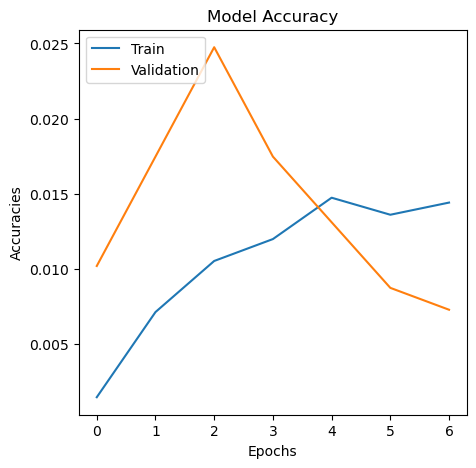

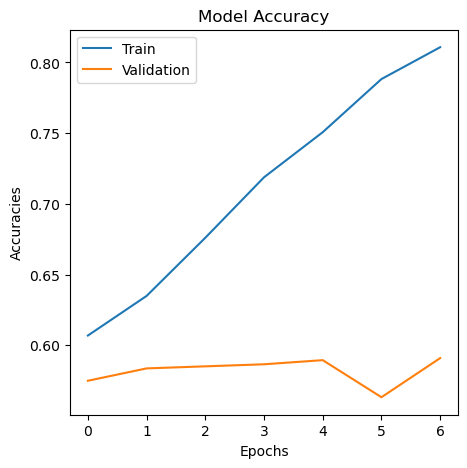

In [150]:
display_type_accuracy(gru_history)
display_price_accuracy(gru_history)

In [151]:
check_accuracy(
    gru_model, 
    {
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    {
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    }
)

215/215 [==============================] - 1s 3ms/step
price accuracy score is: 0.3782051282051282
type accuracy score is: 8.760635198135198


In [152]:
saveScore(gru_model, test_data.id, 
                {
                    'text_input': test_sequences,  # input sequences
                    'image_input': test_images  # input images
                }, 'gru model')

230/230 [==============================] - 1s 3ms/step
Done saving score for gru model


As we see after the classification using GRU there is an overfitting happend,

the test accuracy were too low.

and it doesn't predict any price with class 2.

but there is no problem, lets try the next trail and see what will happen when we use LSTM instead.

---

***

### 2. Trail
try to classify using the images and the text but without the Bidirectional and the LSTM, lets just make it as simple as posible

#### Build Model

In [159]:
def create_multi_input_lstm_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num):
    # Define two inputs: one for text and one for image
    text_input = Input(batch_shape=(None, max_text_length))
    image_input = Input(batch_shape=(None, *image_size, 2))

    # Text processing part
    # Use embedding layer to map input text to continuous space
    vocab_size = len(tokenizer.word_index)
    embedded_text = Embedding(vocab_size + 1, 100)(text_input)
    # Apply LSTM to process the embedded text
    text_output = LSTM(4)(embedded_text)

    # Image processing part
    num_filters = 32
    kernel_size = (16, 16)
    pool_size = (4, 4)
    # Apply convolution with a 15x15 filter and 10 filters
    conv_output = Conv2D(num_filters, kernel_size, activation='relu')(image_input)
    # Add maxpooling layer to downsample the output of the convolution
    maxpool_output = MaxPooling2D(pool_size)(conv_output)
    # Flatten the output of the maxpooling layer
    flattened_output = Flatten()(maxpool_output)

    # Combine the processed text and image features
    fused_features = tf.concat([text_output, flattened_output], axis=-1)
#     fused_features = Dropout(0.2)(fused_features)
#     fused_features = Dense(64, activation='relu')(fused_features)


    # Define two output layers: one for type classification and one for price classification
    type_output = Dense(type_class_num, activation='softmax', name='type')(fused_features)
    price_output = Dense(price_class_num, activation='softmax', name='price')(fused_features)

    # Define the model inputs and outputs
    model = Model(
        inputs={
            'text_input': text_input,
            'image_input': image_input
        },
        outputs={
            'type': type_output,
            'price': price_output,
        },
    )
    
    # Compile the model with appropriate loss functions and metrics
    model.compile(
        optimizer=Adam(),
        loss={
            'type': 'sparse_categorical_crossentropy',
            'price': 'sparse_categorical_crossentropy',
        },
        loss_weights={
            'type': 0.0,  # Weights set to zero because we only want to optimize for price classification
            'price': 1.0,       
        },
        metrics={
            'type': ['SparseCategoricalAccuracy'],
            'price': ['SparseCategoricalAccuracy'],
        },
    )
    
    return model


In [160]:
# Create the multi-input model using the create_multi_input_complex_model() function defined earlier
lstm_model = create_multi_input_lstm_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num)

# Train the model on the input sequences and images, with labels for both type and price
lstm_history = lstm_model.fit(
    x={
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    y={
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    },
    epochs=20,  # number of training epochs
    batch_size=64,  # size of each training batch
    validation_split=0.1,  # proportion of training data to use for validation
    callbacks=[early_stopping],  # early stopping callback to prevent overfitting
    verbose=1  # set to 1 to display training progress during training
)


Epoch 1/20
97/97 [==============================] - 10s 77ms/step - loss: 0.8390 - price_loss: 0.8390 - type_loss: 3.3021 - price_sparse_categorical_accuracy: 0.6192 - type_sparse_categorical_accuracy: 0.0219 - val_loss: 0.8851 - val_price_loss: 0.8851 - val_type_loss: 3.1906 - val_price_sparse_categorical_accuracy: 0.5750 - val_type_sparse_categorical_accuracy: 0.0495
Epoch 2/20
97/97 [==============================] - 4s 42ms/step - loss: 0.7844 - price_loss: 0.7844 - type_loss: 3.1693 - price_sparse_categorical_accuracy: 0.6490 - type_sparse_categorical_accuracy: 0.0303 - val_loss: 0.8120 - val_price_loss: 0.8120 - val_type_loss: 3.1194 - val_price_sparse_categorical_accuracy: 0.6346 - val_type_sparse_categorical_accuracy: 0.0218
Epoch 3/20
97/97 [==============================] - 2s 18ms/step - loss: 0.6929 - price_loss: 0.6929 - type_loss: 3.1367 - price_sparse_categorical_accuracy: 0.7259 - type_sparse_categorical_accuracy: 0.0251 - val_loss: 0.8162 - val_price_loss: 0.8162 - val

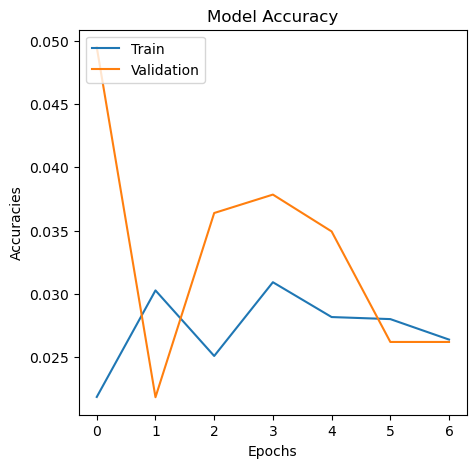

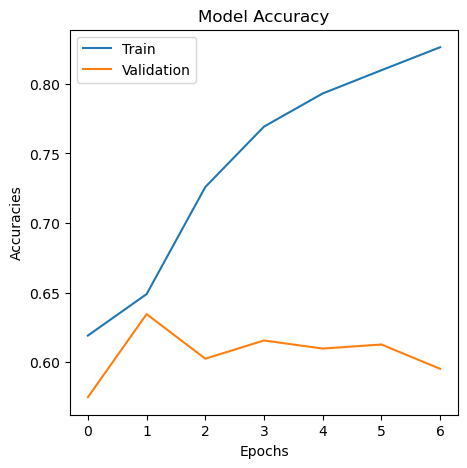

In [165]:
display_type_accuracy(lstm_history)
display_price_accuracy(lstm_history)

In [166]:
check_accuracy(
    lstm_model, 
    {
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    {
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    }
)

215/215 [==============================] - 1s 3ms/step
price accuracy score is: 0.28452797202797203
type accuracy score is: 17.53277972027972


In [175]:
saveScore(lstm_model, test_data.id, 
                {
                    'text_input': test_sequences,  # input sequences
                    'image_input': test_images  # input images
                }, 'lstm model')

230/230 [==============================] - 1s 3ms/step
Done saving score for lstm model


As we see after the classification using LSTM the overfitting happend again,

the test accuracy still too low.

and it doesn't predict any price with class 2.

but there is no problem, lets try the next trail and see what will happen when we use bidirectional layer with LSTM.

***

***

### 3. Trail
try to classify using the Bidirectional and LSTM layer

#### Build Model

In [168]:

def create_multi_input_bi_lstm_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num):
    # Define two inputs: one for text and one for image
    text_input = Input(batch_shape=(None, max_text_length))
    image_input = Input(batch_shape=(None, *image_size, 2))

    # Text processing part
    # Use embedding layer to map input text to continuous space
    vocab_size = len(tokenizer.word_index)
    embedded_text = Embedding(vocab_size + 1, 100)(text_input)
    # Apply LSTM to process the embedded text
    text_output = Bidirectional(LSTM(4, dropout=0.2, recurrent_dropout=0.2))(embedded_text)

    # Image processing part
    num_filters = 32
    kernel_size = (16, 16)
    pool_size = (4, 4)
    # Apply convolution with a 15x15 filter and 10 filters
    conv_output = Conv2D(num_filters, kernel_size, activation='relu')(image_input)
    # Add maxpooling layer to downsample the output of the convolution
    maxpool_output = MaxPooling2D(pool_size)(conv_output)
    # Flatten the output of the maxpooling layer
    flattened_output = Flatten()(maxpool_output)

    # Combine the processed text and image features
    fused_features = tf.concat([text_output, flattened_output], axis=-1)
#     fused_features = Dropout(0.2)(fused_features)
#     fused_features = Dense(64, activation='relu')(fused_features)


    # Define two output layers: one for type classification and one for price classification
    type_output = Dense(type_class_num, activation='softmax', name='type')(fused_features)
    price_output = Dense(price_class_num, activation='softmax', name='price')(fused_features)

    # Define the model inputs and outputs
    model = Model(
        inputs={
            'text_input': text_input,
            'image_input': image_input
        },
        outputs={
            'type': type_output,
            'price': price_output,
        },
    )
    
    # Compile the model with appropriate loss functions and metrics
    model.compile(
        optimizer=Adam(),
        loss={
            'type': 'sparse_categorical_crossentropy',
            'price': 'sparse_categorical_crossentropy',
        },
        loss_weights={
            'type': 0.0,  # Weights set to zero because we only want to optimize for price classification
            'price': 1.0,       
        },
        metrics={
            'type': ['SparseCategoricalAccuracy'],
            'price': ['SparseCategoricalAccuracy'],
        },
    )
    
    return model


In [169]:
# Create the multi-input model using the create_multi_input_complex_model() function defined earlier
bi_lstm_model = create_multi_input_bi_lstm_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num)

# Train the model on the input sequences and images, with labels for both type and price
bi_lstm_history = bi_lstm_model.fit(
    x={
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    y={
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    },
    epochs=20,  # number of training epochs
    batch_size=64,  # size of each training batch
    validation_split=0.1,  # proportion of training data to use for validation
    callbacks=[early_stopping],  # early stopping callback to prevent overfitting
    verbose=1  # set to 1 to display training progress during training
)


Epoch 1/20
97/97 [==============================] - 31s 254ms/step - loss: 0.8351 - price_loss: 0.8351 - type_loss: 3.5290 - price_sparse_categorical_accuracy: 0.6259 - type_sparse_categorical_accuracy: 0.0015 - val_loss: 0.8346 - val_price_loss: 0.8346 - val_type_loss: 3.4583 - val_price_sparse_categorical_accuracy: 0.5779 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/20
97/97 [==============================] - 20s 205ms/step - loss: 0.7493 - price_loss: 0.7493 - type_loss: 3.4736 - price_sparse_categorical_accuracy: 0.6744 - type_sparse_categorical_accuracy: 6.4756e-04 - val_loss: 0.8096 - val_price_loss: 0.8096 - val_type_loss: 3.5325 - val_price_sparse_categorical_accuracy: 0.6434 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/20
97/97 [==============================] - 20s 203ms/step - loss: 0.6570 - price_loss: 0.6570 - type_loss: 3.4786 - price_sparse_categorical_accuracy: 0.7340 - type_sparse_categorical_accuracy: 4.8567e-04 - val_loss: 0.8365 - val_pri

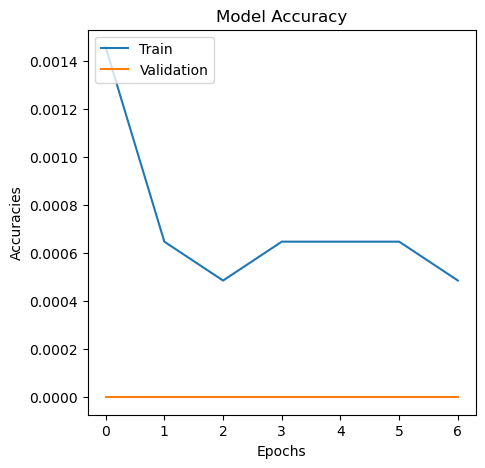

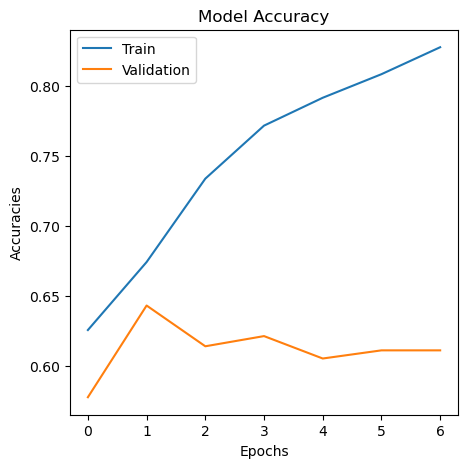

In [170]:
display_type_accuracy(bi_lstm_history)
display_price_accuracy(bi_lstm_history)

In [172]:
check_accuracy(
    bi_lstm_model, 
    {
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    {
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    }
)

215/215 [==============================] - 3s 12ms/step
price accuracy score is: 0.2893356643356643
type accuracy score is: 16.796765734265733


In [174]:
saveScore(bi_lstm_model, test_data.id, 
                {
                    'text_input': test_sequences,  # input sequences
                    'image_input': test_images  # input images
                }, 'bi lstm model')

230/230 [==============================] - 3s 13ms/step
Done saving score for bi lstm model


As we see after the classification using Bidirectional layer with LSTM, the overfitting happend again,

the test accuracy were also too low.

and it doesn't predict any price with class 2 also.

but there is no problem, lets try the next trail and see what will happen when we use bidirectional with GRU instead.

---

***

### 4. Trail
try to classify using the Bidirectional and GRU layer

#### Build Model

In [176]:
def create_multi_input_bi_gru_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num):
    # Define two inputs: one for text and one for image
    text_input = Input(batch_shape=(None, max_text_length))
    image_input = Input(batch_shape=(None, *image_size, 2))

    # Text processing part
    # Use embedding layer to map input text to continuous space
    vocab_size = len(tokenizer.word_index)
    embedded_text = Embedding(vocab_size + 1, 100)(text_input)
    # Apply GRU to process the embedded text
    text_output = Bidirectional(GRU(4, dropout=0.2, recurrent_dropout=0.2))(embedded_text)

    # Image processing part
    num_filters = 32
    kernel_size = (16, 16)
    pool_size = (4, 4)
    # Apply convolution with a 15x15 filter and 10 filters
    conv_output = Conv2D(num_filters, kernel_size, activation='relu')(image_input)
    # Add maxpooling layer to downsample the output of the convolution
    maxpool_output = MaxPooling2D(pool_size)(conv_output)
    # Flatten the output of the maxpooling layer
    flattened_output = Flatten()(maxpool_output)

    # Combine the processed text and image features
    fused_features = tf.concat([text_output, flattened_output], axis=-1)
#     fused_features = Dropout(0.2)(fused_features)
#     fused_features = Dense(64, activation='relu')(fused_features)


    # Define two output layers: one for type classification and one for price classification
    type_output = Dense(type_class_num, activation='softmax', name='type')(fused_features)
    price_output = Dense(price_class_num, activation='softmax', name='price')(fused_features)

    # Define the model inputs and outputs
    model = Model(
        inputs={
            'text_input': text_input,
            'image_input': image_input
        },
        outputs={
            'type': type_output,
            'price': price_output,
        },
    )
    
    # Compile the model with appropriate loss functions and metrics
    model.compile(
        optimizer=Adam(),
        loss={
            'type': 'sparse_categorical_crossentropy',
            'price': 'sparse_categorical_crossentropy',
        },
        loss_weights={
            'type': 0.0,  # Weights set to zero because we only want to optimize for price classification
            'price': 1.0,       
        },
        metrics={
            'type': ['SparseCategoricalAccuracy'],
            'price': ['SparseCategoricalAccuracy'],
        },
    )
    
    return model


In [177]:
# Create the multi-input model using the create_multi_input_complex_model() function defined earlier
bi_gru_model = create_multi_input_bi_gru_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num)

# Train the model on the input sequences and images, with labels for both type and price
bi_gru_history = bi_gru_model.fit(
    x={
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    y={
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    },
    epochs=20,  # number of training epochs
    batch_size=64,  # size of each training batch
    validation_split=0.1,  # proportion of training data to use for validation
    callbacks=[early_stopping],  # early stopping callback to prevent overfitting
    verbose=1  # set to 1 to display training progress during training
)


Epoch 1/20
97/97 [==============================] - 31s 249ms/step - loss: 0.8487 - price_loss: 0.8487 - type_loss: 2.9125 - price_sparse_categorical_accuracy: 0.6162 - type_sparse_categorical_accuracy: 0.4201 - val_loss: 0.8746 - val_price_loss: 0.8746 - val_type_loss: 2.9330 - val_price_sparse_categorical_accuracy: 0.5750 - val_type_sparse_categorical_accuracy: 0.0015
Epoch 2/20
97/97 [==============================] - 20s 203ms/step - loss: 0.7775 - price_loss: 0.7775 - type_loss: 2.9439 - price_sparse_categorical_accuracy: 0.6502 - type_sparse_categorical_accuracy: 0.0364 - val_loss: 0.8030 - val_price_loss: 0.8030 - val_type_loss: 2.9927 - val_price_sparse_categorical_accuracy: 0.6215 - val_type_sparse_categorical_accuracy: 0.0975
Epoch 3/20
97/97 [==============================] - 18s 188ms/step - loss: 0.6732 - price_loss: 0.6732 - type_loss: 2.9460 - price_sparse_categorical_accuracy: 0.7204 - type_sparse_categorical_accuracy: 0.0401 - val_loss: 0.8233 - val_price_loss: 0.8233 

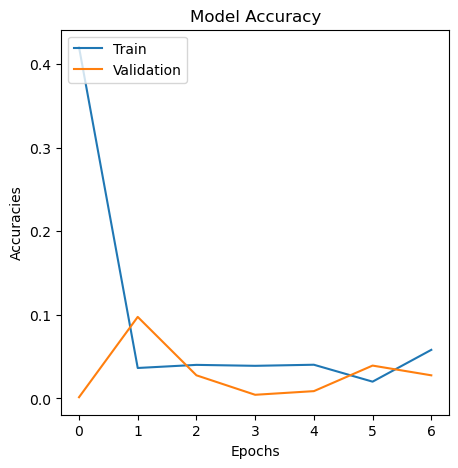

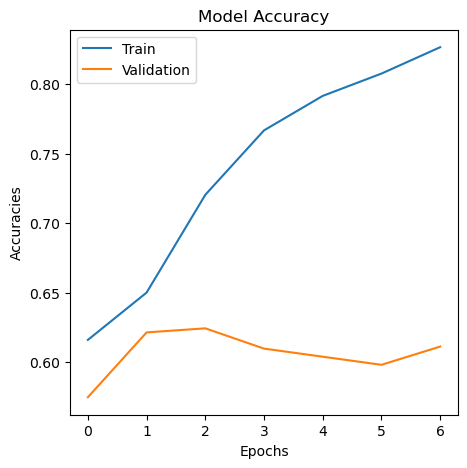

In [178]:
display_type_accuracy(bi_gru_history)
display_price_accuracy(bi_gru_history)

In [179]:
check_accuracy(
    bi_gru_model, 
    {
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    {
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    }
)

215/215 [==============================] - 3s 13ms/step
price accuracy score is: 0.3165792540792541
type accuracy score is: 4.362325174825175


In [180]:
saveScore(bi_gru_model, test_data.id, 
                {
                    'text_input': test_sequences,  # input sequences
                    'image_input': test_images  # input images
                }, 'bi gru model')

230/230 [==============================] - 3s 14ms/step
Done saving score for bi gru model


As we see after the classification using Bidirectional layer with GRU, the overfitting happend again,

the test accuracy were also too low.

and it doesn't predict any price with class 2 also.

but there is no problem, lets try the next trail and see what will happen when we use bidirectional with GRU instead.

---

***

### 5. Trail
try to classify using the Bidirectional and GRU layer but for the two outputs price and type

#### Build Model

In [194]:
def create_multi_input_multi_output_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num):
    # Define two inputs: one for text and one for image
    text_input = Input(batch_shape=(None, max_text_length))
    image_input = Input(batch_shape=(None, *image_size, 2))

    # Text processing part
    # Use embedding layer to map input text to continuous space
    vocab_size = len(tokenizer.word_index)
    embedded_text = Embedding(vocab_size + 1, 100)(text_input)
    # Apply GRU to process the embedded text
    text_output = Bidirectional(GRU(4, dropout=0.2, recurrent_dropout=0.2))(embedded_text)

    # Image processing part
    num_filters = 32
    kernel_size = (16, 16)
    pool_size = (4, 4)
    # Apply convolution with a 15x15 filter and 10 filters
    conv_output = Conv2D(num_filters, kernel_size, activation='relu')(image_input)
    # Add maxpooling layer to downsample the output of the convolution
    maxpool_output = MaxPooling2D(pool_size)(conv_output)
    # Flatten the output of the maxpooling layer
    flattened_output = Flatten()(maxpool_output)

    # Combine the processed text and image features
    fused_features = tf.concat([text_output, flattened_output], axis=-1)
    fused_features = Dropout(0.2)(fused_features)
    fused_features = Dense(64, activation='relu')(fused_features)


    # Define two output layers: one for type classification and one for price classification
    type_output = Dense(type_class_num, activation='softmax', name='type')(fused_features)
    price_output = Dense(price_class_num, activation='softmax', name='price')(fused_features)

    # Define the model inputs and outputs
    model = Model(
        inputs={
            'text_input': text_input,
            'image_input': image_input
        },
        outputs={
            'type': type_output,
            'price': price_output,
        },
    )
    
    # Compile the model with appropriate loss functions and metrics
    model.compile(
        optimizer=Adam(),
        loss={
            'type': 'sparse_categorical_crossentropy',
            'price': 'sparse_categorical_crossentropy',
        },
        metrics={
            'type': ['SparseCategoricalAccuracy'],
            'price': ['SparseCategoricalAccuracy'],
        },
    )
    
    return model


In [195]:
# Create the multi-input model using the create_multi_input_complex_model() function defined earlier
multi_out_model = create_multi_input_multi_output_model(tokenizer, max_text_length, image_size, type_class_num, price_class_num)

# Train the model on the input sequences and images, with labels for both type and price
multi_out_history = multi_out_model.fit(
    x={
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    y={
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    },
    epochs=20,  # number of training epochs
    batch_size=64,  # size of each training batch
    validation_split=0.1,  # proportion of training data to use for validation
    callbacks=[early_stopping],  # early stopping callback to prevent overfitting
    verbose=1  # set to 1 to display training progress during training
)


Epoch 1/20
97/97 [==============================] - 30s 244ms/step - loss: 1.9702 - price_loss: 0.8531 - type_loss: 1.1171 - price_sparse_categorical_accuracy: 0.6121 - type_sparse_categorical_accuracy: 0.7513 - val_loss: 1.9835 - val_price_loss: 0.8568 - val_type_loss: 1.1266 - val_price_sparse_categorical_accuracy: 0.5750 - val_type_sparse_categorical_accuracy: 0.7249
Epoch 2/20
97/97 [==============================] - 19s 195ms/step - loss: 1.8219 - price_loss: 0.8131 - type_loss: 1.0088 - price_sparse_categorical_accuracy: 0.6362 - type_sparse_categorical_accuracy: 0.7598 - val_loss: 2.0786 - val_price_loss: 0.8277 - val_type_loss: 1.2510 - val_price_sparse_categorical_accuracy: 0.6041 - val_type_sparse_categorical_accuracy: 0.7249
Epoch 3/20
97/97 [==============================] - 18s 182ms/step - loss: 1.7582 - price_loss: 0.7422 - type_loss: 1.0160 - price_sparse_categorical_accuracy: 0.6830 - type_sparse_categorical_accuracy: 0.7598 - val_loss: 2.0454 - val_price_loss: 0.9210 

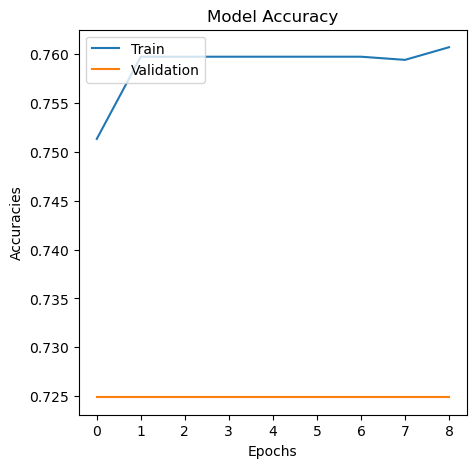

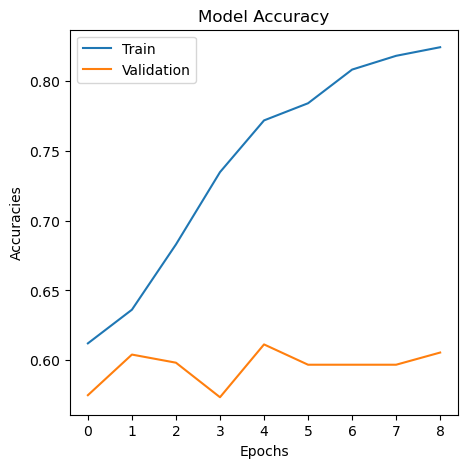

In [196]:
display_type_accuracy(multi_out_history)
display_price_accuracy(multi_out_history)

In [197]:
check_accuracy(
    multi_out_model, 
    {
        'text_input': sequences,  # input sequences
        'image_input': images  # input images
    },
    {
        'type': labels[:,1],  # labels for type classification
        'price': labels[:,0],  # labels for price classification
    }
)

215/215 [==============================] - 3s 14ms/step
price accuracy score is: 0.2572843822843823
type accuracy score is: 3.2527680652680653


In [198]:
saveScore(multi_out_model, test_data.id, 
                {
                    'text_input': test_sequences,  # input sequences
                    'image_input': test_images  # input images
                }, 'multi out model')

230/230 [==============================] - 3s 13ms/step
Done saving score for multi out model


As we see after the classification using Bidirectional layer with GRU for the two outputs, the overfitting happend again but now it is for the two of them.😭

the test accuracy were also too low.

and it doesn't predict any price with class 2 again

but there is a problem now, the trails are finished and the time also but I will keep try understanding the issue on my own.

---

***

## Conclusion

As you can see, I tried many times but it seems that I'm trapped between 50% and 60% accuracy on kaggle leaderboard.

and between 27 and 33 here.

but I never give up, and I really enjoyed updating the parameters and the denses but without any imporvement 😂😂